__Author: IDIKA, UDUMA UDUMA__

__Major:__ Data Management and Artificial Intelligence

__Topic:__ Basis Functions for Non-Linearity

We start with a simple linear model and train it using gradient descent.

__Objectives:__

In this project, I successfully implemented the following:
1. Defined a Polynomial Basis Function to Handle Non-Linearity.
2. Defined a Gaussian Basis Function for Flexibility
3. Defined a Fourier Basis Function for Periodicity
4. Optimized the Weights of each of the Three Basis Functions using both Gradient Descent and the Normal Equation

This project demonstrates how to build a basis function from scratch, leveraging JAX.

Step 1: Generate Synthetic Data

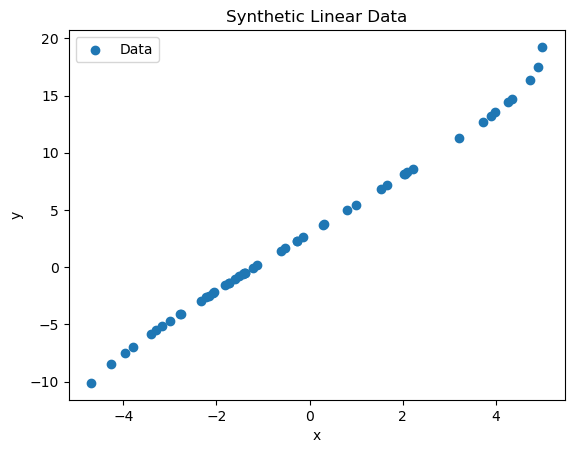

In [7]:
import jax
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt

# Create synthetic linear data with noise
key = jax.random.PRNGKey(42)  #Initializes a JAX Pseudo-Random Number Generator (PRNG) Key with a seed value of 42
x = jax.random.uniform(key, shape=(50,), minval=-5, maxval=5)
y = 2 * x + 3 + jax.random.normal(key, shape=(50,)) * 2  # y = 2x + 3 + 2*noise

# Plot
plt.scatter(x, y, label="Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Linear Data")
plt.legend()
plt.show()

Step 2: Define the Linear Model

In [9]:
def linear_model(w, x):
    return w[0] + w[1] * x  # w[0] = bias, w[1] = slope

Step 3: Define Loss Function and Compute Gradients

In [11]:
from jax import grad

def mse_loss(w, x, y):
    predictions = linear_model(w, x)
    return jnp.mean((predictions - y) ** 2)

grad_loss = grad(mse_loss)

Step 4: Train Using Gradient Descent

In [13]:
def train_linear_model(epochs=100, lr=0.01):
    w = jnp.array([0.0, 0.0])  # Initialize weights
    for _ in range(epochs):
        grads = grad_loss(w, x, y)
        w = w - lr * grads  # Gradient descent step
    return w

w_trained = train_linear_model()
print("Trained Weights:", w_trained)

Trained Weights: [2.7296011 2.6793592]


Step 5: Visualizing the Results

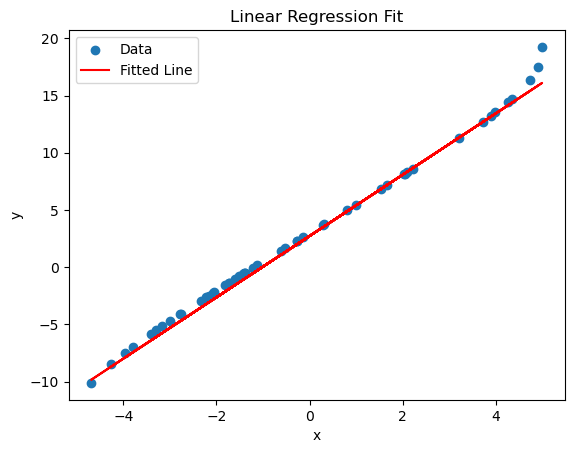

In [15]:
plt.scatter(x, y, label="Data")
plt.plot(x, linear_model(w_trained, x), color="red", label="Fitted Line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

Limitations of Linear Regression

Example: Consider quadratic data:

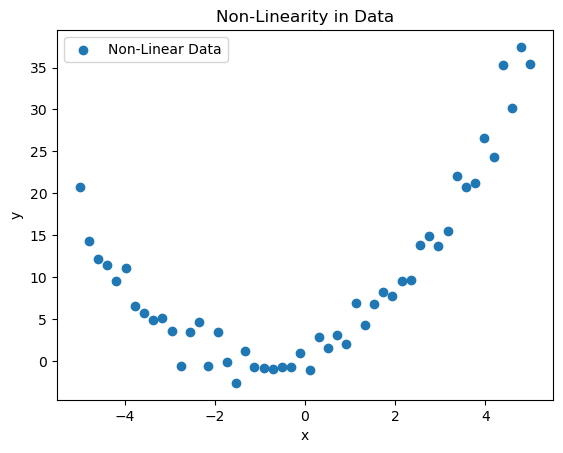

In [18]:
x = jnp.linspace(-5, 5, 50)
y = x**2 + 2*x + 1 + jax.random.normal(key, shape=(50,)) * 2

plt.scatter(x, y, label="Non-Linear Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Non-Linearity in Data")
plt.legend()
plt.show()

A linear model will fail to fit this data well.

If the true relationship is complex (e.g., sinusoidal, exponential), linear regression does not have enough expressiveness.

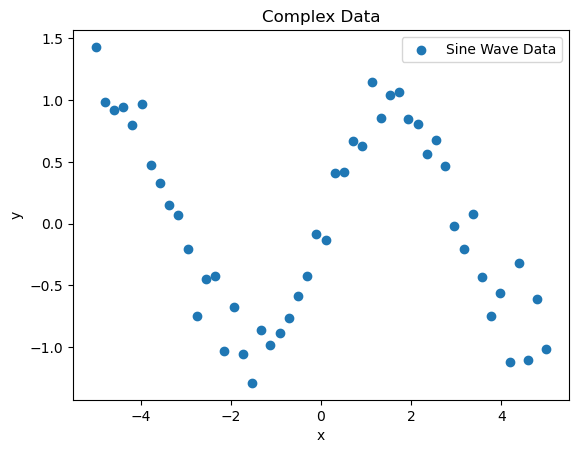

In [21]:
x = jnp.linspace(-5, 5, 50)
y = jnp.sin(x) + jax.random.normal(key, shape=(50,)) * 0.2

plt.scatter(x, y, label="Sine Wave Data")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Complex Data")
plt.legend()
plt.show()


A linear model is too restrictive to capture this pattern.

You are supposed to code here (after research) for the next steps (with pure functions):

*   Polynomial Basis Functions to model non-linearity.
*   Gaussian Basis Functions for flexibility.
*   Fourier Basis Functions for periodicity.






**<h3>Method A: Computing Weights using Gradient Descent</h3>**

**<h4>Number 1: Polynomial Basis Function to Model Non-Linearity</h4>**

Initial Weights: [-0.5675502   0.28439185 -0.9320608 ]
Optimized Weights: [ 0.60819054 -3.0065393   2.0621789 ]

Polynomial Features:
[[ 1.         -3.          9.        ]
 [ 1.         -2.6842105   7.204986  ]
 [ 1.         -2.368421    5.6094184 ]
 [ 1.         -2.0526316   4.2132964 ]
 [ 1.         -1.736842    3.0166202 ]
 [ 1.         -1.4210527   2.0193908 ]
 [ 1.         -1.1052632   1.2216069 ]
 [ 1.         -0.78947365  0.62326866]
 [ 1.         -0.47368425  0.22437677]
 [ 1.         -0.15789485  0.02493078]
 [ 1.          0.15789473  0.02493075]
 [ 1.          0.47368413  0.22437666]
 [ 1.          0.78947365  0.62326866]
 [ 1.          1.105263    1.2216063 ]
 [ 1.          1.4210525   2.01939   ]
 [ 1.          1.7368422   3.0166206 ]
 [ 1.          2.0526314   4.2132955 ]
 [ 1.          2.3684208   5.6094174 ]
 [ 1.          2.6842105   7.204986  ]
 [ 1.          3.          9.        ]]

Predicted Output:
[28.187418   23.536345   19.296566   15.468079   12.050884    9.04

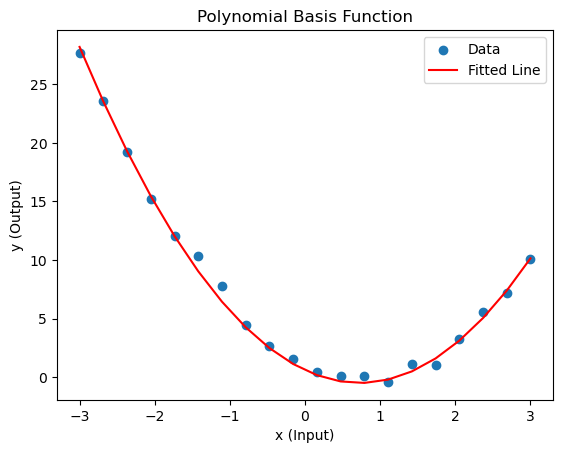

In [26]:
#Step 1: Defining inputs and target
key = jax.random.PRNGKey(42)

#Note:
#Jax requires the use of a new key each time we use the jax.random function
#key, subkey = jax.random.split(key)   #This splits the key defined above

X = jnp.linspace(-3, 3, 20)
y = 2*(X**2) - 3*X + 1 + 0.5*jax.random.normal(key=key, shape=X.shape[0])
degree = 2

#Step 2: Defining the Polynomial features
def poly_features(x, degree):
    return jnp.column_stack([x**i for i in range(0, degree+1)])

X_poly = poly_features(X, degree)
        
#Step 3: Defining the model for making predictions
def poly_model(w, X_poly):
    return jnp.dot(X_poly, w)

#Step 4: Defining the cost function (mse_loss) and computing the gradients
def mse_loss(w, X_poly, y):
    y_pred = poly_model(w, X_poly)
    return jnp.mean((y - y_pred)**2)

grad_loss = grad(mse_loss)

#Step 5: Function to initialize the Weights
def initialize_weights(degree, key):
    """Initializes weights for polynomial regression."""
    return jax.random.normal(key, shape=(degree + 1))


#Step 6: Train using Gradient Descent
epochs = 100
lr = 0.01

def train_poly_model(epochs, lr):
    global key                               #Accessing the global key earlier defined
    key, subkey = jax.random.split(key)
    w = initialize_weights(degree, subkey)   #Initializing weights
    print(f"Initial Weights: {w}")
    
    for _ in range(epochs):
        grads = grad_loss(w, X_poly, y)
        w = w - (lr*grads)                  #Gradient Descent Step
    return w

w_optimized = train_poly_model(epochs, lr)

#Step 7: Making predictions using the Optimized Weights
y_pred = poly_model(w_optimized, X_poly)


print(f"Optimized Weights: {w_optimized}\n")
print(f"Polynomial Features:\n{X_poly}\n")
print(f"Predicted Output:\n{y_pred}\n")

#Step 8: Visualizing the result
plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color="red", label="Fitted Line")
plt.xlabel("x (Input)")
plt.ylabel("y (Output)")
plt.legend()
plt.title("Polynomial Basis Function")
plt.show()

**<h4>Number 2: Gaussian Basis Function for Flexibility</h4>**

Number of mu centres: 7

Optimized Weights: [ 0.5012985   0.7447477  -1.501179    0.13764268  0.67812246  0.47010088
 -1.4475757 ]

Gaussian Features:
[[1.00000000e+00 4.34598148e-01 3.56739797e-02 5.53084654e-04
  1.61959429e-06 8.95771401e-10 9.35764053e-14]
 [9.87582982e-01 5.26372254e-01 5.29893041e-02 1.00753352e-03
  3.61831235e-06 2.45430010e-09 3.14432860e-13]
 [9.51249301e-01 6.21792138e-01 7.67665431e-02 1.79008977e-03
  7.88411216e-06 6.55853372e-09 1.03047649e-12]
 [8.93639326e-01 7.16381967e-01 1.08468309e-01 3.10196588e-03
  1.67550970e-05 1.70935373e-08 3.29378452e-12]
 [8.18798900e-01 8.04991543e-01 1.49479344e-01 5.24260616e-03
  3.47286914e-05 4.34515997e-08 1.02683157e-11]
 [7.31710911e-01 8.82236600e-01 2.00912252e-01 8.64179153e-03
  7.02063626e-05 1.07727274e-07 3.12213623e-11]
 [6.37747765e-01 9.43030953e-01 2.63377577e-01 1.38933724e-02
  1.38424133e-04 2.60491134e-07 9.25866050e-11]
 [5.42132556e-01 9.83136952e-01 3.36742789e-01 2.17850637e-02
  2.66191753e-04 

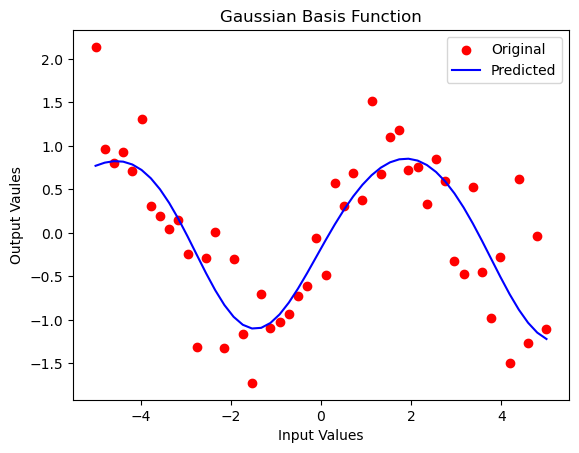

In [28]:
#Step 1:
#Generating random input and target values
# Generate sample data
key = jax.random.PRNGKey(42)
X = jnp.linspace(-5, 5, 50)  # Feature values
y = jnp.sin(X).ravel() + 0.5*jax.random.normal(key, X.shape[0])  # Noisy target values

#Step 2:
#Generating the Gaussian Features

# First, determine the number of Gaussian centres using the rule of thumb of sqrt(N)
num_centres = int(round(jnp.sqrt(X.shape[0])))  #Ensuring it is a whole number
print(f"Number of mu centres: {num_centres}\n")

def mu_values(x):
    min_value = x.min()
    max_value = x.max()
    return jnp.linspace(min_value, max_value, num_centres)

#Determining the spread(width), sigma
sigma = jnp.mean(jnp.diff(mu_values(X)))
    
def gaussian_function(x, mu, sigma):
    # Returning the Gaussian feature
    return jnp.exp(-(x-mu)**2/(2*sigma))

X_gaussian = jnp.column_stack([gaussian_function(X, mu, sigma) for mu in mu_values(X)])


#Step 3:
#Definining the Gaussian Model Prediction
def gaussian_model(w, x):
    return jnp.dot(x, w)

#Step 4:
#Defining the cost function (mse_loss) and computing the gradients
def mse_loss(w, x, y):
    y_pred = gaussian_model(w, x)
    return jnp.mean((y - y_pred)**2)
    
#Computing the gradient of the loss to be optimized
grad_loss = grad(mse_loss)

#Step 5:
#Initialize the Weights
def initialize_weights(num_centres, key):
    """Initializes weights for the Gaussian Basis function."""
    return jax.random.normal(key, shape=num_centres)

#Step 6:
#Train the model using Gradient Descent

lr = 0.01
num_iter = 1000
#Minimizing the cost function by optimizing the weights
def compute_weights(lr, num_iter, x_gaussian, y):
    #Randomly initializing the weights
    global key
    key, subkey = jax.random.split(key)
    w = initialize_weights(num_centres, subkey)

    for _ in range(num_iter):
        grads = grad_loss(w, x_gaussian, y)
        w = w - (lr*grads)
    return w
    

w_optimized = compute_weights(lr, num_iter, X_gaussian, y)

    
#Step 7: 
#Making predictions using the Optimized Weights

y_pred = gaussian_model(w_optimized, X_gaussian)


print(f"Optimized Weights: {w_optimized}\n")
print(f"Gaussian Features:\n{X_gaussian}\n")
print(f"Predicted Output:\n{y_pred}\n")

#Step 8:
#Visualizing the results
plt.scatter(X, y, label="Original", color="red")
plt.plot(X, y_pred, label="Predicted", color="blue")
plt.legend()
plt.xlabel("Input Values")
plt.ylabel("Output Vaules")
plt.title("Gaussian Basis Function")
plt.show();

**<h3>Number 3: Fourier Basis Function for Periodicity</h3>**

(50, 11)
Optimized Weights: [-7.0329695e-03  9.4980294e-01 -1.8663637e-02 -1.1061612e-01
 -2.9686140e-03 -3.2252323e-02  1.5135695e-01  6.3067205e-02
  1.2483157e-01  4.4322308e-02 -2.0861395e-05]

Fourier Features:
[[ 1.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  1.0000000e+00  1.0000000e+00
   1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.2787716e-01  2.5365460e-01  3.7526700e-01
   4.9071756e-01  5.9811056e-01  9.9179000e-01  9.6729487e-01
   9.2691678e-01  8.7131870e-01  8.0141360e-01]
 [ 1.0000000e+00  2.5365460e-01  4.9071756e-01  6.9568253e-01
   8.5514277e-01  9.5866787e-01  9.6729487e-01  8.7131870e-01
   7.1834940e-01  5.1839250e-01  2.8452760e-01]
 [ 1.0000000e+00  3.7526703e-01  6.9568259e-01  9.1441262e-01
   9.9948621e-01  9.3846840e-01  9.2691678e-01  7.1834934e-01
   4.0478337e-01  3.2051511e-02 -3.4536511e-01]
 [ 1.0000000e+00  4.9071756e-01  8.5514277e-01  9.9948621e-01
   8.8659924e-01  5.4553491e-01  8

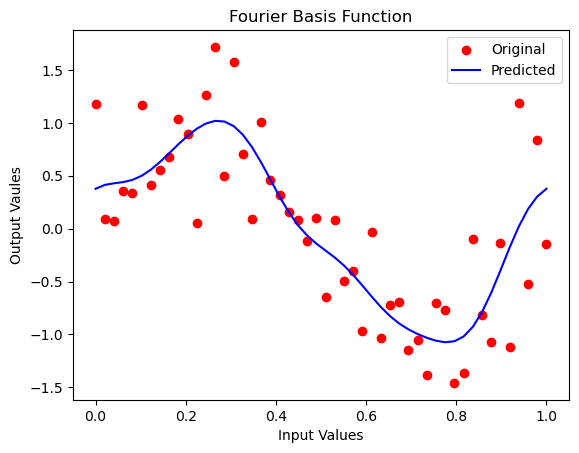

In [30]:
#Step 1: Generate synthetic periodic data
key = jax.random.PRNGKey(42)
X = jnp.linspace(0, 1, 50)                 # Feature values in [0,1]
y = jnp.sin(2 * jnp.pi * X).ravel() + 0.5*jax.random.normal(key, shape=(X.shape[0],))  #Define an actual target with noise.
M = 5

#Step 2: Develop the Fourier Basis features
#First, write a function that generates the Fourier Basis features for a given input, 'X' and M
def fourier_basis(x, m):
    if x.ndim == 1:
        x_column = x.reshape(-1,1)            #Ensuring the input is a column vector
        k = jnp.arange(1, m+1).reshape(-1,1)  #Creating an array of frequencies
    
        ones_term = jnp.ones_like(x_column)              #Bias term. Shape: (n,1) where n is the number of elements. (50,1) in this case
        sine_terms = (jnp.sin(2 * jnp.pi * k.T * x_column))    #Broadcast between k.T => (1,m) and x_column => (n,1). Final Shape: (n,m) i.e. (50, 5) in this case
        cosine_terms = (jnp.cos(2 * jnp.pi * k.T * x_column))
        fourier_features = jnp.column_stack((ones_term, sine_terms, cosine_terms))
    
    if x.ndim == 2:
        n_samples, n_features = x.shape  # Number of samples and features
        k = jnp.arange(1, m + 1).reshape(-1, 1)  # Frequencies

        # Initialize the list to hold all Fourier terms
        fourier_terms = [jnp.ones((n_samples, 1))]  # Start with the bias term

        for feature in range(n_features):
            X = x[:, feature].reshape(-1, 1)  # Select the current feature
            # Sine and cosine terms for the current feature
            sine_terms = jnp.sin(2 * jnp.pi * k.T * X)  # Shape: (n_samples, m)
            cosine_terms = jnp.cos(2 * jnp.pi * k.T * X)  # Shape: (n_samples, m)

            # Append the sine and cosine terms to the list
            fourier_terms.append(sine_terms)
            fourier_terms.append(cosine_terms)

        # Concatenate all terms along the second axis
        fourier_features = jnp.hstack(fourier_terms)
  
    return fourier_features

X_fourier = fourier_basis(X, M)
print(X_fourier.shape)

#Step 3:
#Function to make prediction using the Fourier Basis Features
def fourier_model(w, x_fourier):
    return jnp.dot(x_fourier, w)

#Step 4:
#Determining the cost function and computing the gradient

def mse_loss(w, x_fourier, y):
    y_pred = fourier_model(w, x_fourier)
    return jnp.mean((y - y_pred)**2)

grad_loss = grad(mse_loss)
    
#Step 5:
#Function to initialize weights
def initialize_weights(m, key):
    #Shape[0] of the weight is 2k+1 (in this case k => M=5)
    return jax.random.normal(key, shape=((2*m)+1))

#Step 6:
#Optimize the weights
lr = 0.01
num_iter = 1000
def compute_weights(lr, num_iter, m, x_fourier, y):
    global key
    key, subkey = jax.random.split(key)
    w = initialize_weights(m, subkey)

    for _ in range(num_iter):
        grads = grad_loss(w, x_fourier, y)
        w = w - (lr*grads)
    return w

w_optimized = compute_weights(lr, num_iter, M, X_fourier, y)

#Step 7: 
#Making predictions using the Optimized Weights

y_pred = fourier_model(w_optimized, X_fourier)


print(f"Optimized Weights: {w_optimized}\n")
print(f"Fourier Features:\n{X_fourier}\n")
print(f"Predicted Output:\n{y_pred}\n")


#Step 8:
#Visualizing the results
plt.scatter(X, y, label="Original", color="red")
plt.plot(X, y_pred, label="Predicted", color="blue")
plt.legend()
plt.xlabel("Input Values")
plt.ylabel("Output Vaules")
plt.title("Fourier Basis Function")
plt.show();

**<h3>Method B: Computing Weights using the Normal Equation</h3>**

**<h4>Number 1: Polynomial Basis Function to Model Non-Linearity</h4>**

In [33]:
#Step 1: Generate sample input and target data

# Generate sample input (feature) data: x values
X = jnp.linspace(-3, 3, 20)  # 20 points from -3 to 3

# Generate sample target (output) data with some noise
key = jax.random.PRNGKey(42)
y = 2 * X**2 - 3 * X + 1 + 0.5 * jax.random.normal(key=key, shape=X.shape)  # Quadratic relationship with noise

degree = 2  #Order/Degree of the polynomial

#Step 2: Generate the Polynomial features to obtain the design matrix
def poly_design_matrix(features, degree):
    #This function generates the design matrix of the Polynomial basis function
    n_samples = features.shape[0]
    X_polynomial = jnp.column_stack([features**d for d in range(0,degree+1)])
    return X_polynomial

X_poly = poly_design_matrix(X, degree)

#Step 3: Compute Weights using the normal equation
def compute_weights(X, y):
    #Applying the normal equation to get the optimal weights
    return jnp.linalg.inv(X.T @ X) @ X.T @ y   #linalg --> linera algebra

weights = compute_weights(X_poly, y)

#Step 4: Predict using the learned weights (ypred = XW)
def predict(X, weights):
    return X @ weights

y_pred = predict(X_poly, weights)

#Step 5: Print results
print(f"Ploynomial Features (Design Matrix):\n{X_poly}")
print(f"Optimal weights: {weights}\n")
print(f"Predicted values: \n{y_pred}\n")
print(f"Actual values: \n{y}")



Ploynomial Features (Design Matrix):
[[ 1.         -3.          9.        ]
 [ 1.         -2.6842105   7.204986  ]
 [ 1.         -2.368421    5.6094184 ]
 [ 1.         -2.0526316   4.2132964 ]
 [ 1.         -1.736842    3.0166202 ]
 [ 1.         -1.4210527   2.0193908 ]
 [ 1.         -1.1052632   1.2216069 ]
 [ 1.         -0.78947365  0.62326866]
 [ 1.         -0.47368425  0.22437677]
 [ 1.         -0.15789485  0.02493078]
 [ 1.          0.15789473  0.02493075]
 [ 1.          0.47368413  0.22437666]
 [ 1.          0.78947365  0.62326866]
 [ 1.          1.105263    1.2216063 ]
 [ 1.          1.4210525   2.01939   ]
 [ 1.          1.7368422   3.0166206 ]
 [ 1.          2.0526314   4.2132955 ]
 [ 1.          2.3684208   5.6094174 ]
 [ 1.          2.6842105   7.204986  ]
 [ 1.          3.          9.        ]]
Optimal weights: [ 1.0760214 -3.0099893  1.9817781]

Predicted values: 
[27.941994   23.43415    19.321566   15.604239   12.282169    9.355359
  6.823806    4.687509    2.946471    1

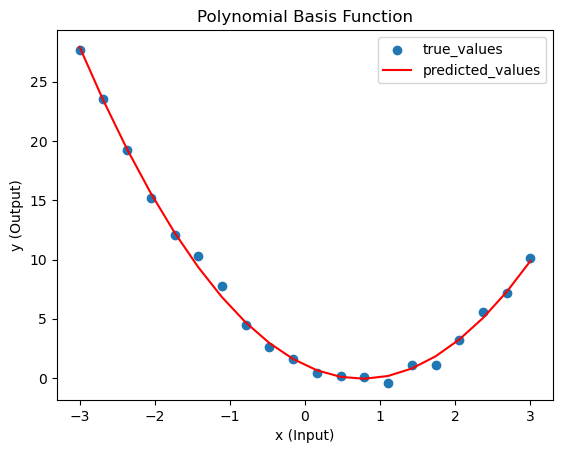

In [34]:
#Visualizing the result

plt.scatter(X, y, label="true_values")
plt.plot(X, y_pred, label="predicted_values", color = "red")
plt.xlabel("x (Input)")
plt.ylabel("y (Output)")
plt.legend()
plt.title("Polynomial Basis Function")
plt.show()

**<h4>Number 2: Gaussian Basis Function for Flexibility</h4>**

In [36]:
#Step 1:
#Generating random input and target values
# Generate sample data
key = jax.random.PRNGKey(42)
X = jnp.linspace(-5, 5, 50)  # Feature values
y = jnp.sin(X).ravel() + 0.5*jax.random.normal(key, X.shape[0])  # Noisy target values

#Step 2: Develop the design matrix using the Gaussian Basis Functions
#First, let's define a function that returns the values of mu for the evenly spaced centres  and the spread(sigma).

def mu_values_func(x):
    #Let's use the rule of thumb of taking the sqrt of the (number of training samples) to determine the number of centres
    num_centres = int(round(jnp.sqrt(x.shape[0])))
    min_value = x.min()
    max_value = x.max()
    return jnp.linspace(min_value, max_value, num=num_centres)

mu_values = mu_values_func(X)

#We can now compute the sigma by taking the mean of the differences between consecutive mu centres
sigma = jnp.mean(jnp.diff(mu_values))

#Now that we have mu and sigma, we can develop the Design Matrix using the Gaussian Basis Functions
def gaussian_functions(x, mu, sigma):
    return jnp.exp(-((x-mu)**2)/(2*(sigma**2)))

gaussian_features = jnp.column_stack([gaussian_functions(X, mu, sigma) for mu in mu_values])    #This matrix contains the Gaussian features

#Step 3: Determine the optimal weights using the normal equation
def compute_weights(x,y):
    return jnp.linalg.inv(x.T @ x) @ (x.T @ y)

weights = compute_weights(gaussian_features, y)

#Step 4: Predict target values using the linear equation (XW) where W is the learned weights and X is the gaussian design matrix features
def predict(x,w):
    return x @ w

y_pred = predict(gaussian_features, weights)

#Print out the results
print(f"Input values:\n{X}\n")
print(f"Gaussian features:\n{gaussian_features}\n")
print(f"Actual target values:\n{y}\n")
print(f"Predicted target values:\n{y_pred}")

Input values:
[-5.         -4.7959185  -4.591837   -4.3877554  -4.1836734  -3.9795918
 -3.7755103  -3.5714288  -3.367347   -3.1632655  -2.9591837  -2.7551022
 -2.5510206  -2.3469388  -2.1428573  -1.9387757  -1.7346941  -1.5306122
 -1.3265307  -1.1224492  -0.91836745 -0.7142859  -0.5102044  -0.30612254
 -0.10204101  0.10204077  0.3061223   0.51020384  0.7142855   0.918367
  1.1224488   1.3265305   1.530612    1.7346935   1.9387753   2.142857
  2.3469386   2.5510201   2.7551017   2.9591832   3.1632652   3.3673468
  3.5714283   3.7755098   3.9795916   4.183673    4.3877544   4.5918365
  4.795918    5.        ]

Gaussian features:
[[1.00000000e+00 6.06530666e-01 1.35335281e-01 1.11090019e-02
  3.35462624e-04 3.72664954e-06 1.52300093e-08]
 [9.92531180e-01 6.80418015e-01 1.71598300e-01 1.59204695e-02
  5.43380273e-04 6.82271411e-06 3.15149968e-08]
 [9.70457673e-01 7.51946807e-01 2.14340016e-01 2.24763062e-02
  8.67065566e-04 1.23050713e-05 6.42426556e-08]
 [9.34754074e-01 8.18628371e-01 2.6

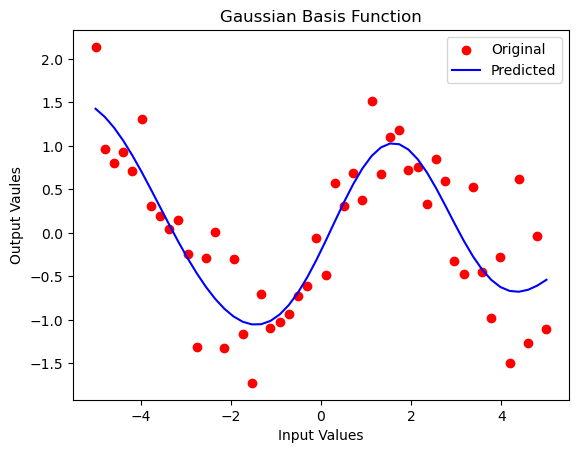

In [37]:
#Visualizing the results
plt.scatter(X,y, label="Original", color="red")
plt.plot(X, y_pred, label="Predicted", color="blue")
plt.legend()
plt.xlabel("Input Values")
plt.ylabel("Output Vaules")
plt.title("Gaussian Basis Function")
plt.show();

**<h3>Number 3: Fourier Basis Function for Periodicity</h3>**

(50, 11)
Input values:
[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204081
 0.12244898 0.14285713 0.1632653  0.18367347 0.20408162 0.2244898
 0.24489796 0.26530612 0.28571427 0.30612245 0.3265306  0.34693876
 0.36734694 0.3877551  0.40816325 0.42857143 0.4489796  0.46938774
 0.48979592 0.5102041  0.53061223 0.5510204  0.57142854 0.59183675
 0.6122449  0.63265306 0.6530612  0.67346936 0.6938775  0.7142857
 0.7346939  0.75510204 0.7755102  0.79591835 0.8163265  0.83673465
 0.85714287 0.877551   0.8979592  0.9183673  0.9387755  0.95918363
 0.97959185 1.        ]

Actual target values:
[ 1.1787523   0.09403782  0.07006447  0.35739946  0.3369733   1.1647278
  0.40936515  0.55697924  0.6772633   1.0396503   0.89216053  0.05470264
  1.2658824   1.7172794   0.49833363  1.5761809   0.7085178   0.095541
  1.0087556   0.45473242  0.32142124  0.16109234  0.07906431 -0.1207689
  0.10286496 -0.649571    0.08540365 -0.49514145 -0.39749855 -0.9665296
 -0.03518397 -1.0346727  -0.71959937

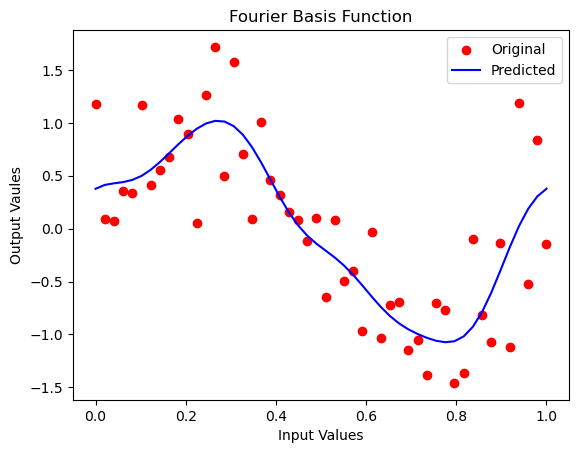

In [39]:
#Step 1: Generate synthetic periodic data
key = jax.random.PRNGKey(42)
X = jnp.linspace(0, 1, 50)                 # Feature values in [0,1]
y = jnp.sin(2 * jnp.pi * X).ravel() + 0.5*jax.random.normal(key, shape=(X.shape[0],))  #Define an actual target with noise.
M = 5

def fourier_basis(x, m):
    if x.ndim == 1:
        x_column = x.reshape(-1,1)            #Ensuring the input is a column vector
        k = jnp.arange(1, m+1).reshape(-1,1)  #Creating an array of frequencies
    
        ones_term = jnp.ones_like(x_column)              #Bias term. Shape: (n,1) where n is the number of elements. (50,1) in this case
        sine_terms = (jnp.sin(2 * jnp.pi * k.T * x_column))    #Broadcast between k.T => (1,m) and x_column => (n,1). Final Shape: (n,m) i.e. (50, 5) in this case
        cosine_terms = (jnp.cos(2 * jnp.pi * k.T * x_column))
        fourier_features = jnp.column_stack((ones_term, sine_terms, cosine_terms))
    
    if x.ndim == 2:
        n_samples, n_features = x.shape  # Number of samples and features
        k = jnp.arange(1, m + 1).reshape(-1, 1)  # Frequencies

        # Initialize the list to hold all Fourier terms
        fourier_terms = [jnp.ones((n_samples, 1))]  # Start with the bias term

        for feature in range(n_features):
            X = x[:, feature].reshape(-1, 1)  # Select the current feature
            # Sine and cosine terms for the current feature
            sine_terms = jnp.sin(2 * jnp.pi * k.T * X)  # Shape: (n_samples, m)
            cosine_terms = jnp.cos(2 * jnp.pi * k.T * X)  # Shape: (n_samples, m)

            # Append the sine and cosine terms to the list
            fourier_terms.append(sine_terms)
            fourier_terms.append(cosine_terms)

        # Concatenate all terms along the second axis
        fourier_features = jnp.hstack(fourier_terms)
  
    return fourier_features

fourier_features = fourier_basis(X, M)
print(fourier_features.shape)

#Step 3: Determining the optimal weights by applying the normal equation on the Fourier design matrix features
def compute_weights(x,y):
    return jnp.linalg.inv(x.T @ x) @ (x.T @ y)

weights = compute_weights(fourier_features, y)

#Step 4: Predict target values using the linear equation (XW) where W is the learned weights and X is the Fourier design matrix features
def predict(x,w):
    return x @ w

y_pred = predict(fourier_features, weights)

#Step 5:
#Print out the results
print(f"Input values:\n{X}\n")
#print(f"Fourier features:\n{fourier_features}\n")
print(f"Actual target values:\n{y}\n")
print(f"Predicted target values:\n{y_pred}")

#Step 6:
#Visualize the results
#Visualizing the results
#Visualizing the results
plt.scatter(X,y, label="Original", color="red")
plt.plot(X, y_pred, label="Predicted", color="blue")
plt.legend()
plt.xlabel("Input Values")
plt.ylabel("Output Vaules")
plt.title("Fourier Basis Function")
plt.show();